<a href="https://colab.research.google.com/github/sundar-nallalagappan/Coursera_NLP_assignments/blob/main/IMDB_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("sairam")

sairam


In [3]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Flatten, GlobalAveragePooling1D, LSTM, Bidirectional, Embedding
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow_datasets as tfds

In [4]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train, test = imdb['train'], imdb['test']

train_dataset = train.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset  = test.padded_batch(BATCH_SIZE)


In [7]:
# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm output units: {lstm_dim}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm output units: 8


In [8]:
random_inp = np.random.rand(batch_size, timesteps, features)
print(f'shape of input array: {random_inp.shape}')

shape of input array: (1, 20, 16)


In [9]:
# Define LSTM that returns a single output
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_inp)
print(f'shape of lstm output(return_sequences=False): {result.shape}')


shape of lstm output(return_sequences=False): (1, 8)


In [10]:
# Define LSTM that returns a sequence
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_inp)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

shape of lstm output(return_sequences=True): (1, 20, 8)


In [11]:
embed_size = 64
lstm1=64
lstm2=32

model = Sequential([
    Embedding(tokenizer.vocab_size, embed_size),
    Bidirectional(LSTM(lstm1, return_sequences=True)),
    Bidirectional(LSTM(lstm2)),
    Dense(64, "relu"),
    Dense(1, "sigmoid")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [13]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

history = model.fit(train_dataset, validation_data=test_dataset, epochs=10, batch_size=128)

Epoch 1/10
98/98 [==============================] - 69s 582ms/step - loss: 0.6529 - accuracy: 0.6061 - val_loss: 0.5149 - val_accuracy: 0.7668
Epoch 2/10
98/98 [==============================] - 51s 522ms/step - loss: 0.4302 - accuracy: 0.8118 - val_loss: 0.4396 - val_accuracy: 0.8020
Epoch 3/10
98/98 [==============================] - 46s 465ms/step - loss: 0.3489 - accuracy: 0.8578 - val_loss: 0.4178 - val_accuracy: 0.8135
Epoch 4/10
98/98 [==============================] - 45s 455ms/step - loss: 0.2672 - accuracy: 0.8981 - val_loss: 0.4756 - val_accuracy: 0.7767
Epoch 5/10
98/98 [==============================] - 43s 440ms/step - loss: 0.2345 - accuracy: 0.9136 - val_loss: 0.3877 - val_accuracy: 0.8463
Epoch 6/10
98/98 [==============================] - 41s 416ms/step - loss: 0.2390 - accuracy: 0.9126 - val_loss: 0.4596 - val_accuracy: 0.8226
Epoch 7/10
98/98 [==============================] - 40s 408ms/step - loss: 0.1771 - accuracy: 0.9358 - val_loss: 0.5061 - val_accuracy: 0.8267

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

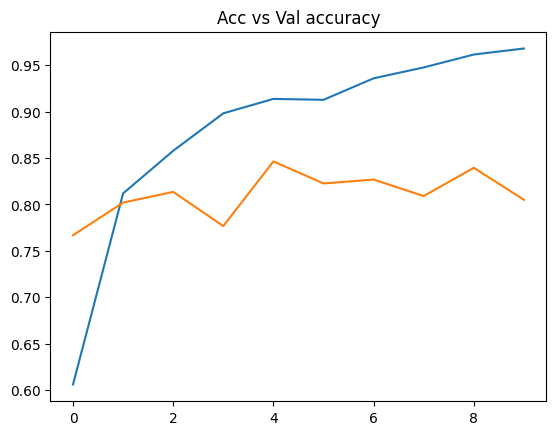

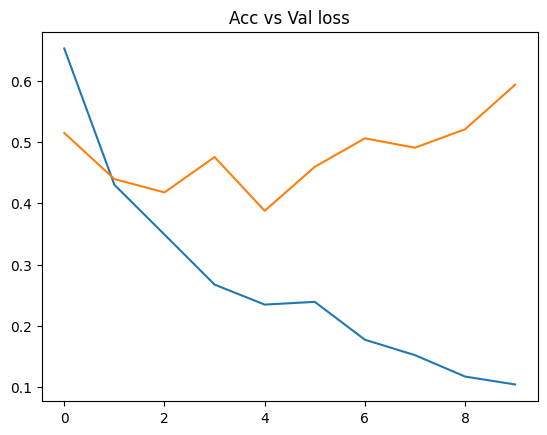

In [18]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.plot(range(10), acc)
plt.plot(range(10), val_acc)
plt.title("Acc vs Val accuracy")
plt.show()

plt.plot(range(10), loss)
plt.plot(range(10), val_loss)
plt.title("Acc vs Val loss")
plt.show()